In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import chi2_contingency
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from random import randrange, uniform

In [2]:
Train_Data = pd.read_csv(r'Downloads/uber_sampled_train.csv')
Train_Data.head(5)

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,13112538,2013-09-12 19:48:00.00000048,14.5,2013-09-12 19:48:00 UTC,-73.963927,40.776715,-73.981230,40.744362,5
1,27522324,2013-08-22 21:51:33.0000001,18.5,2013-08-22 21:51:33 UTC,-73.987196,40.720433,-73.979128,40.772561,1
2,26162875,2009-05-11 18:46:00.000000173,5.3,2009-05-11 18:46:00 UTC,-73.989912,40.751997,-73.977732,40.748800,1
3,5707300,2009-11-17 20:52:54.0000003,10.5,2009-11-17 20:52:54 UTC,-73.987425,40.741593,-73.958254,40.772870,1
4,43561908,2011-07-14 20:33:39.0000003,16.1,2011-07-14 20:33:39 UTC,-73.978324,40.745629,-73.994166,40.703158,1


In [3]:
print(Train_Data.columns)

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')


In [4]:
#Dropping unnamed coumn to process data.

Train_Data.drop(labels='Unnamed: 0',axis=1,inplace=True)

In [5]:
Train_Data.drop(labels='key',axis=1,inplace=True)

In [6]:
Train_Data.shape

(70000, 7)

In [7]:
test = pd.read_csv(r'Downloads/uber_sampled_test.csv')
test.head(5)

,Unnamed: 0,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [8]:
print(test.columns)

Index(['Unnamed: 0', 'key', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')


In [9]:
print("Row and Column for Test data is",test.shape)
print("Row and Column for Train data is",Train_Data.shape)

Row and Column for Test data is (9914, 8)
Row and Column for Train data is (70000, 7)


In [10]:
Train_Data.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,14.5,2013-09-12 19:48:00 UTC,-73.963927,40.776715,-73.981230,40.744362,5
1,18.5,2013-08-22 21:51:33 UTC,-73.987196,40.720433,-73.979128,40.772561,1
2,5.3,2009-05-11 18:46:00 UTC,-73.989912,40.751997,-73.977732,40.748800,1
3,10.5,2009-11-17 20:52:54 UTC,-73.987425,40.741593,-73.958254,40.772870,1
4,16.1,2011-07-14 20:33:39 UTC,-73.978324,40.745629,-73.994166,40.703158,1


In [11]:
test.head()

,Unnamed: 0,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


<h1> As this is Taxi fare data and we know there are many factors which affect the price of taxi like </h1>

1. Travelled distance<br>
2. Time of Travel<br>
3. Demand and Availability of Taxi<br>
4. Some special places are more costlier like Airport or other places where there might be toll

In [12]:
print(Train_Data.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fare_amount        70000 non-null  float64
 1   pickup_datetime    70000 non-null  object 
 2   pickup_longitude   70000 non-null  float64
 3   pickup_latitude    70000 non-null  float64
 4   dropoff_longitude  70000 non-null  float64
 5   dropoff_latitude   70000 non-null  float64
 6   passenger_count    70000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 3.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         9914 non-null   int64  
 1   key                9914 non-null   object 
 2   pickup_datetime    9914 non-null   object 
 3   pickup_longitude   9914 non-null   float64

<h1>Data Cleaning</h1>

<h5>here we can see there are 8columns in which 6 numerics and 2 are object.</h5>
<h5>Lets change the type of pickup_datetime from object to DateTime</h5>

In [13]:
Train_Data["pickup_datetime"] = pd.to_datetime(Train_Data["pickup_datetime"])

In [14]:
print(Train_Data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   fare_amount        70000 non-null  float64            
 1   pickup_datetime    70000 non-null  datetime64[ns, UTC]
 2   pickup_longitude   70000 non-null  float64            
 3   pickup_latitude    70000 non-null  float64            
 4   dropoff_longitude  70000 non-null  float64            
 5   dropoff_latitude   70000 non-null  float64            
 6   passenger_count    70000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1)
memory usage: 3.7 MB
None


In [15]:
Train_Data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,11.261658,-72.498630,39.950258,-72.508637,39.918108,1.693429
std,9.654077,10.881647,9.566680,10.544393,6.898035,1.319192
min,0.010000,-736.016667,-74.008928,-75.415770,-834.457250,0.000000
25%,6.000000,-73.992038,40.735181,-73.991315,40.734205,1.000000
50%,8.500000,-73.981690,40.752911,-73.980215,40.753299,1.000000
75%,12.500000,-73.967018,40.767330,-73.963817,40.768167,2.000000
max,247.000000,363.630298,1993.880665,405.566222,42.387233,6.000000


1.Here first thing which we can see is minimum value of fare is negative which is -52 which is not the valid value, so we need to remove the fare which are negative values.

2.Secondly, passenger_count minimum value is 0 and maximum value is 208 which impossible, so we need to remove them as well, for safer side we can think that a taxi can have maximum 7 people.

In [16]:
Train_Data.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [17]:
Train_Data.dropna(axis = 0, inplace= True)

In [18]:
print(Train_Data.isnull().sum())

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


<h1>Exploratory Data Analysis</h1>

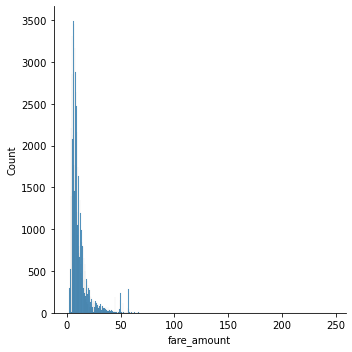

In [19]:
sns.displot(Train_Data['fare_amount'])

C:\Users\mohit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pickup_latitude', ylabel='Density'>

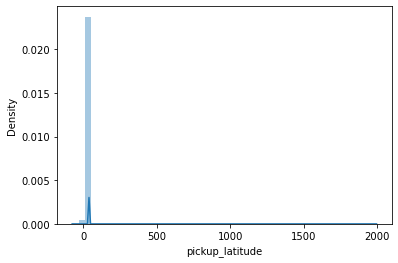

In [20]:
sns.distplot(Train_Data['pickup_latitude'])

C:\Users\mohit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pickup_longitude', ylabel='Density'>

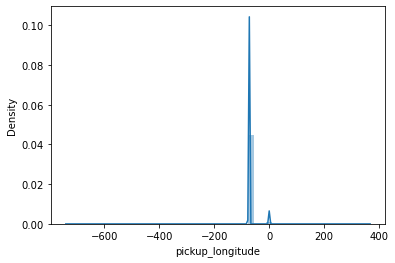

In [21]:
sns.distplot(Train_Data['pickup_longitude'])

C:\Users\mohit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='dropoff_longitude', ylabel='Density'>

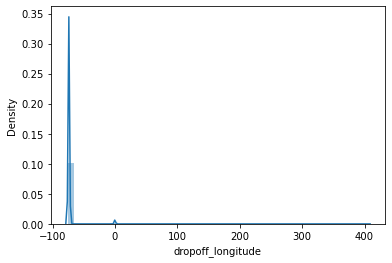

In [22]:
sns.distplot(Train_Data['dropoff_longitude'])

C:\Users\mohit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='dropoff_latitude', ylabel='Density'>

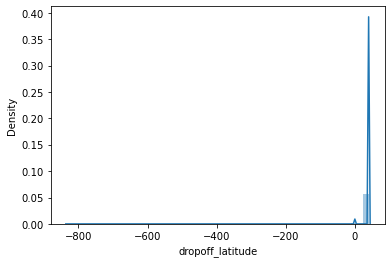

In [23]:
sns.distplot(Train_Data['dropoff_latitude'])

In [24]:
print("drop_off latitude min value",Train_Data["dropoff_latitude"].min())
print("drop_off latitude max value",Train_Data["dropoff_latitude"].max())
print("drop_off longitude min value", Train_Data["dropoff_longitude"].min())
print("drop_off longitude max value",Train_Data["dropoff_longitude"].max())
print("pickup latitude min value",Train_Data["pickup_latitude"].min())
print("pickup latitude max value",Train_Data["pickup_latitude"].max())
print("pickup longitude min value",Train_Data["pickup_longitude"].min())
print("pickup longitude max value",Train_Data["pickup_longitude"].max())

drop_off latitude min value -834.45725
drop_off latitude max value 42.387233
drop_off longitude min value -75.415770475609
drop_off longitude max value 405.566222
pickup latitude min value -74.008928
pickup latitude max value 1993.880665
pickup longitude min value -736.016667
pickup longitude max value 363.630298


In [25]:
print("drop_off latitude min value",test["dropoff_latitude"].min())
print("drop_off latitude max value",test["dropoff_latitude"].max())
print("drop_off longitude min value", test["dropoff_longitude"].min())
print("drop_off longitude max value",test["dropoff_longitude"].max())
print("pickup latitude min value",test["pickup_latitude"].min())
print("pickup latitude max value",test["pickup_latitude"].max())
print("pickup longitude min value",test["pickup_longitude"].min())
print("pickup longitude max value",test["pickup_longitude"].max())

drop_off latitude min value 40.568973
drop_off latitude max value 41.696683
drop_off longitude min value -74.263242
drop_off longitude max value -72.990963
pickup latitude min value 40.573143
pickup latitude max value 41.709555
pickup longitude min value -74.252193
pickup longitude max value -72.986532


In [26]:
min_longitude=-1491.194073,
min_latitude=-74.001047,
max_longitude=40.812005, 
max_latitude=41.709555

In [27]:
min_longitude=-1491.194073,
min_latitude=-74.001047,
max_longitude=40.812005, 
max_latitude=41.709555

In [28]:
tempdf=Train_Data[(Train_Data["dropoff_latitude"]<min_latitude) | 
                (Train_Data["pickup_latitude"]<min_latitude) |
                (Train_Data["dropoff_longitude"]<min_longitude) | 
                (Train_Data["pickup_longitude"]<min_longitude) |
                (Train_Data["dropoff_latitude"]>max_latitude) | 
                (Train_Data["pickup_latitude"]>max_latitude) | 
                (Train_Data["dropoff_longitude"]>max_longitude) | 
                (Train_Data["pickup_longitude"]>max_longitude) ]
print("before droping",Train_Data.shape)
Train_Data.drop(tempdf.index,inplace=True)
print("after droping",Train_Data.shape)

before droping (70000, 7)
after droping (69988, 7)


In [29]:
import calendar
Train_Data['day']=Train_Data['pickup_datetime'].apply(lambda x:x.day)
Train_Data['hour']=Train_Data['pickup_datetime'].apply(lambda x:x.hour)
Train_Data['month']=Train_Data['pickup_datetime'].apply(lambda x:x.month)
Train_Data['year']=Train_Data['pickup_datetime'].apply(lambda x:x.year)
Train_Data['weekday']=Train_Data['pickup_datetime'].apply(lambda x: calendar.day_name[x.weekday()])

In [30]:
Train_Data.weekday = Train_Data.weekday.map({'Sunday':0,'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6})

In [31]:
Train_Data.drop(labels = 'pickup_datetime',axis=1,inplace=True)

In [32]:
Train_Data.head(1)
Train_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69988 entries, 0 to 69999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fare_amount        69988 non-null  float64
 1   pickup_longitude   69988 non-null  float64
 2   pickup_latitude    69988 non-null  float64
 3   dropoff_longitude  69988 non-null  float64
 4   dropoff_latitude   69988 non-null  float64
 5   passenger_count    69988 non-null  int64  
 6   day                69988 non-null  int64  
 7   hour               69988 non-null  int64  
 8   month              69988 non-null  int64  
 9   year               69988 non-null  int64  
 10  weekday            69988 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 6.4 MB


# Model Building

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x=Train_Data.drop("fare_amount", axis=1)
x

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,month,year,weekday
0,-73.963927,40.776715,-73.981230,40.744362,5,12,19,9,2013,4
1,-73.987196,40.720433,-73.979128,40.772561,1,22,21,8,2013,4
2,-73.989912,40.751997,-73.977732,40.748800,1,11,18,5,2009,1
3,-73.987425,40.741593,-73.958254,40.772870,1,17,20,11,2009,2
4,-73.978324,40.745629,-73.994166,40.703158,1,14,20,7,2011,4
...,...,...,...,...,...,...,...,...,...,...
69995,-73.971322,40.753210,-73.895368,40.707588,1,15,0,6,2010,2
69996,-73.950905,40.770807,-73.961363,40.771855,1,19,14,6,2014,4
69997,0.000000,0.000000,0.000000,0.000000,1,5,11,9,2013,4
69998,-73.982768,40.756722,-73.981030,40.778332,1,13,12,10,2010,3


In [35]:
y=Train_Data["fare_amount"]

In [36]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [37]:
x_train.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,month,year,weekday
29802,-73.984140,40.754765,-74.000040,40.738060,1,2,22,10,2013,3
16903,-73.991707,40.749720,-73.994840,40.740257,1,21,11,2,2014,5
6917,-73.999233,40.733485,-73.971887,40.754998,1,22,21,6,2011,3
4288,-73.975008,40.760788,-74.003923,40.747743,1,11,21,8,2010,3
39045,-73.995550,40.724871,-74.007854,40.738126,1,10,17,12,2013,2


In [38]:
x_test.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,month,year,weekday
36642,-73.981949,40.745846,-73.972862,40.746651,3,9,14,4,2015,4
27029,-73.980718,40.781475,-73.998932,40.760751,1,18,18,1,2014,6
66041,-73.955976,40.772288,-73.985897,40.755926,1,16,14,5,2009,6
60284,-73.982652,40.773395,-73.987031,40.751006,1,15,6,4,2010,4
53145,-73.979435,40.743912,-73.979475,40.737259,2,17,23,5,2010,1


In [39]:
y_train.head()

29802    8.0
16903    6.0
6917     9.7
4288     5.3
39045    8.0
Name: fare_amount, dtype: float64

In [40]:
y_test.head()

36642     8.0
27029     8.5
66041    14.9
60284     6.5
53145     4.1
Name: fare_amount, dtype: float64

In [41]:
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y_train.shape)

(55990, 10)
(13998, 10)
(13998,)
(55990,)


# Linear Regression

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
lrmodel=LinearRegression()
lrmodel.fit(x_train, y_train)

LinearRegression()

In [44]:
predictedvalues = lrmodel.predict(x_test)

In [45]:
from sklearn.metrics import mean_squared_error

In [46]:
lrmodelrmse = np.sqrt(mean_squared_error(predictedvalues, y_test))
print("RMSE value for Linear regression is", lrmodelrmse)

RMSE value for Linear regression is 9.635058913168516


# Random Forest

In [47]:
from sklearn.ensemble import RandomForestRegressor
rfrmodel = RandomForestRegressor(n_estimators=100, random_state=101)

In [48]:
rfrmodel.fit(x_train,y_train)
rfrmodel_pred= rfrmodel.predict(x_test)

In [49]:
rfrmodel_rmse=np.sqrt(mean_squared_error(rfrmodel_pred, y_test))
print("RMSE value for Random forest regression is ",rfrmodel_rmse)

RMSE value for Random forest regression is  4.4746380096185465


In [50]:
rfrmodel_pred.shape

(13998,)

# Working on Test Data

In [54]:
test = pd.read_csv(r'Downloads/uber_sampled_test.csv')

In [56]:
test.columns

Index(['Unnamed: 0', 'key', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')

In [59]:
test.drop(test[['Unnamed: 0','key']],axis=1,inplace=True)

In [60]:
test.isnull().sum()

pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [61]:
test["pickup_datetime"] = pd.to_datetime(test["pickup_datetime"])

In [62]:
test['day']=test['pickup_datetime'].apply(lambda x:x.day)
test['hour']=test['pickup_datetime'].apply(lambda x:x.hour)
test['month']=test['pickup_datetime'].apply(lambda x:x.month)
test['year']=test['pickup_datetime'].apply(lambda x:x.year)
test['weekday']=test['pickup_datetime'].apply(lambda x: calendar.day_name[x.weekday()])

In [63]:
test.head(5)

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,month,year,weekday
0,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1,27,13,1,2015,Tuesday
1,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1,27,13,1,2015,Tuesday
2,2011-10-08 11:53:44+00:00,-73.982524,40.751260,-73.979654,40.746139,1,8,11,10,2011,Saturday
3,2012-12-01 21:12:12+00:00,-73.981160,40.767807,-73.990448,40.751635,1,1,21,12,2012,Saturday
4,2012-12-01 21:12:12+00:00,-73.966046,40.789775,-73.988565,40.744427,1,1,21,12,2012,Saturday


In [64]:
test.drop(['pickup_datetime'], axis = 1, inplace = True)

In [65]:
test.weekday = test.weekday.map({'Sunday':0,'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6})

In [66]:
rfrmodel_pred= rfrmodel.predict(test)

In [67]:
df = pd.DataFrame(rfrmodel_pred)
df

,0
0,8.6250
1,9.5650
2,5.7660
3,8.3704
4,13.7120
...,...
9909,8.7200
9910,9.9300
9911,64.0860
9912,18.5046


In [68]:
df.to_csv('pred.csv')